In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment/Unemployment in India.xlsx


# Unemployment in India during COVID-19

## Objective of Analysis: 
The objective of this analysis is to understand the impact of COVID-19 on the job market in India. We will use a dataset containing the unemployment rate of all the states in India. The dataset includes information such as States, Date, Frequency, Estimated Unemployment Rate (%), Estimated Employed, and Estimated Labour Participation Rate (%).

## This dataset contains the unemployment rate of all the states in India
- States = states in India, 
- Date = date which the unemployment rate observed,
- Frequency = measuring frequency (Monthly),
- Estimated Unemployment Rate (%) = Percentage of people unemployed in each States of India,
- Estimated Employed = Number of people employed,
- Estimated Labour Participation Rate (%) = The labour force participation rate is the portion of the working population in the 16-64 years' age group in the economy currently in employment or seeking employment.

In [2]:
import os;
os.listdir('/kaggle/input/')

['unemployment']

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_excel("/kaggle/input/unemployment/Unemployment in India.xlsx")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,Longitude,Latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural,South,15.9129,79.74
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural,South,15.9129,79.74
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural,South,15.9129,79.74
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural,South,15.9129,79.74
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural,South,15.9129,79.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    int64  
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
 7   Region.1                                 740 non-null    object 
 8   Longitude                                740 non-null    float64
 9   Latitude                                 740 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 5

In [6]:
# Renaming column names
df.rename(columns = {"Region.1": "Region", "Region": "States", "Estimated Unemployment Rate (%)": "Unemployment Rate", 
          "Estimated Labour Participation Rate (%)": "Labour Participation Rate" }, inplace = True)

# Changing Data Types
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Changing data type to datetime
df['Region'] = df['Region'].astype('category')  # Changing data type to category

# Creating new columns from Date column 
df['Month'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.strftime('%B')
df['Year'] = df['Date'].dt.year
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')  # df['Year_Month'] = df['Date'].dt.to_period('M')

In [7]:
df.head(2)

,States,Date,Frequency,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,South,15.9129,79.74,5,May,2019,2019-05
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,South,15.9129,79.74,6,June,2019,2019-06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   States                     740 non-null    object        
 1   Date                       740 non-null    datetime64[ns]
 2   Frequency                  740 non-null    object        
 3   Unemployment Rate          740 non-null    float64       
 4   Estimated Employed         740 non-null    int64         
 5   Labour Participation Rate  740 non-null    float64       
 6   Area                       740 non-null    object        
 7   Region                     740 non-null    category      
 8   Longitude                  740 non-null    float64       
 9   Latitude                   740 non-null    float64       
 10  Month                      740 non-null    int64         
 11  Month Name                 740 non-null    object        
 12  Year    

## Exploratory Data Analysis (EDA)

In [9]:
# Checking Null Values

df.isnull().any()

States                       False
Date                         False
Frequency                    False
Unemployment Rate            False
Estimated Employed           False
Labour Participation Rate    False
Area                         False
Region                       False
Longitude                    False
Latitude                     False
Month                        False
Month Name                   False
Year                         False
Year_Month                   False
dtype: bool

In [10]:
# Checking Duplicates Value

df.duplicated().any()

False

In [11]:
# Basic Statistics

round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57
Longitude,740.0,23.65,9.20,10.85,18.11,23.61,27.53,76.77
Latitude,740.0,79.68,8.51,30.74,76.09,79.02,85.10,92.94
Month,740.0,6.39,3.24,1.00,4.00,6.00,9.00,12.00
Year,740.0,2019.42,0.49,2019.00,2019.00,2019.00,2020.00,2020.00


<Axes: >

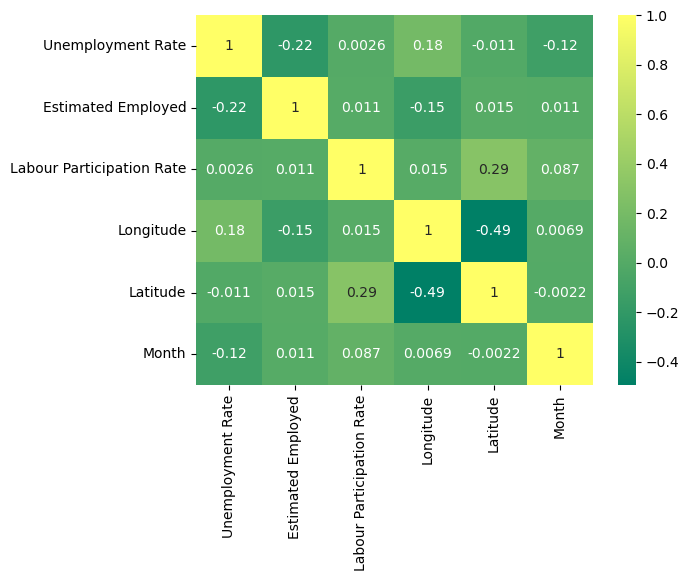

In [13]:
# Correlation Heatmap

data = df[['Unemployment Rate', 'Estimated Employed', 'Labour Participation Rate', 'Longitude', 'Latitude', 'Month']]
data = data.corr()
sns.heatmap(data, annot=True, cmap='summer')

### Univariate Analysis

#### Frequency

In [14]:
df['Frequency'].value_counts()

# Only Monthly data is there so will remove this feature

df.drop(columns=['Frequency'], inplace=True)

In [15]:
df.head(2)

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
0,Andhra Pradesh,2019-05-31,3.65,11999139,43.24,Rural,South,15.9129,79.74,5,May,2019,2019-05
1,Andhra Pradesh,2019-06-30,3.05,11755881,42.05,Rural,South,15.9129,79.74,6,June,2019,2019-06


#### Date

In [16]:
df['Date'].unique()  # 14 Dates or 14 Month Data is there from "2019-05" to "2020-06"

array(['2019-05-31T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-07-31T00:00:00.000000000', '2019-08-31T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-10-31T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-04-30T00:00:00.000000000',
       '2020-05-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

#### States

In [17]:
df['States'].unique().tolist() 

['Andhra Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Meghalaya',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'Chandigarh']

In [18]:
df['States'].nunique()  

28

In [19]:
df['States'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: States, dtype: int64

#### Unemployment Rate and Labour Participation Rate

<Axes: >

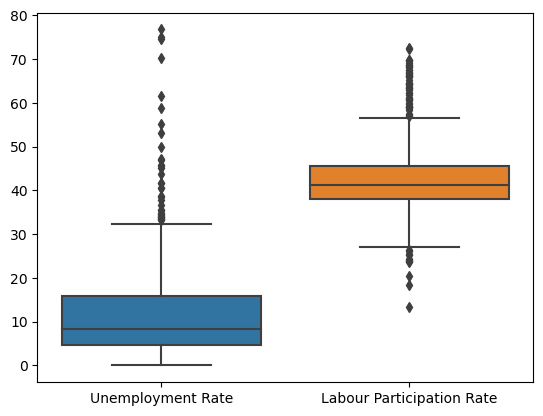

In [20]:
# Let's check for Outliers in Unemployment Rate and Labour Participation Rate column

columns = ['Unemployment Rate', 'Labour Participation Rate']
sns.boxplot(data=df[columns])

# Thus there are outliers in Unemployment rate and Labour Participation Rate

In [21]:
df[df['Unemployment Rate'] >= 32]  # As we can observe the unemployemnt rate is more in 2020 as most of the outliers are in year 2020 

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
37,Bihar,2020-04-30,45.09,14645275,38.63,Rural,East,25.0961,85.3131,4,April,2020,2020-04
38,Bihar,2020-05-31,47.26,14050319,38.50,Rural,East,25.0961,85.3131,5,May,2020,2020-05
105,Haryana,2020-04-30,41.61,4041050,49.85,Rural,North,29.0588,76.0856,4,April,2020,2020-04
106,Haryana,2020-05-31,34.22,3914193,42.78,Rural,North,29.0588,76.0856,5,May,2020,2020-05
107,Haryana,2020-06-30,35.57,4357835,48.53,Rural,North,29.0588,76.0856,6,June,2020,2020-06
144,Jharkhand,2020-04-30,41.72,4280434,36.92,Rural,East,23.6102,85.2799,4,April,2020,2020-04
145,Jharkhand,2020-05-31,55.10,3315038,37.03,Rural,East,23.6102,85.2799,5,May,2020,2020-05
158,Karnataka,2020-04-30,33.17,9330400,43.25,Rural,South,15.3173,75.7139,4,April,2020,2020-04
242,Puducherry,2020-04-30,74.51,49420,46.79,Rural,South,11.9416,79.8083,4,April,2020,2020-04
255,Punjab,2020-05-31,40.59,3727366,41.14,Rural,North,31.1471,75.3412,5,May,2020,2020-05


In [22]:
df[df['Unemployment Rate'] == max(df['Unemployment Rate'])]  # Maximum Unemployemnt Rate is in Puducherry Urban area in April 2020 

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
613,Puducherry,2020-04-30,76.74,68122,35.54,Urban,South,11.9416,79.8083,4,April,2020,2020-04


In [23]:
df[df['Unemployment Rate'] == min(df['Unemployment Rate'])]  # Minimum Unemployemnt Rate is in Puducherry

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
25,Assam,2020-06-30,0.0,7544937,34.38,Rural,Northeast,26.2006,92.9376,6,June,2020,2020-06
51,Chhattisgarh,2020-04-30,0.0,6534321,39.43,Rural,West,21.2787,81.8661,4,April,2020,2020-04
77,Goa,2020-02-29,0.0,171672,36.11,Rural,West,15.2993,74.1240,2,February,2020,2020-02
231,Puducherry,2019-05-31,0.0,172474,43.08,Rural,South,11.9416,79.8083,5,May,2019,2019-05
232,Puducherry,2019-06-30,0.0,184527,45.95,Rural,South,11.9416,79.8083,6,June,2019,2019-06
233,Puducherry,2019-07-31,0.0,139227,34.56,Rural,South,11.9416,79.8083,7,July,2019,2019-07
235,Puducherry,2019-09-30,0.0,175718,43.34,Rural,South,11.9416,79.8083,9,September,2019,2019-09
237,Puducherry,2019-11-30,0.0,142787,35.00,Rural,South,11.9416,79.8083,11,November,2019,2019-11
274,Sikkim,2020-04-30,0.0,133399,37.72,Rural,Northeast,27.5330,88.5122,4,April,2020,2020-04
603,Puducherry,2019-06-30,0.0,304369,37.73,Urban,South,11.9416,79.8083,6,June,2019,2019-06


In [24]:
df[df['Labour Participation Rate'] == max(df['Labour Participation Rate'])]  # Maximum Labour Participation rate is in Telangana in Sept 2019

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
294,Telangana,2019-09-30,5.49,12636415,72.57,Rural,South,18.1124,79.0193,9,September,2019,2019-09


In [25]:
df[df['Labour Participation Rate'] == min(df['Labour Participation Rate'])]  # Minimum Labour Participation rate is in Kerala in April 2020

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
172,Kerala,2020-04-30,10.71,1754170,13.33,Rural,South,10.8505,76.2711,4,April,2020,2020-04


#### Estimated Employed

In [26]:
df[df["Estimated Employed"] == max(df["Estimated Employed"])]  # Highest no. of Estimated Employed is in Uttar Pradesh, however that can be due to highest population

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
326,Uttar Pradesh,2020-01-31,6.06,45777509,39.67,Rural,North,26.8467,80.9462,1,January,2020,2020-01


In [27]:
df[df["Estimated Employed"] == min(df["Estimated Employed"])]  # Lowest no. of Estimated Employed is in Puducherry, however that cab be due to low population

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
242,Puducherry,2020-04-30,74.51,49420,46.79,Rural,South,11.9416,79.8083,4,April,2020,2020-04


#### Area

In [28]:
df["Area"].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

#### Region

In [29]:
df["Region"].value_counts()

North        228
South        166
West         136
East         112
Northeast     98
Name: Region, dtype: int64

#### Month or Month Name

In [30]:
df['Month Name'].value_counts()

May          105
June         104
October       55
November      55
July          54
August        53
December      53
January       53
February      53
September     52
March         52
April         51
Name: Month Name, dtype: int64

#### Year

In [31]:
df['Year'].value_counts()

2019    430
2020    310
Name: Year, dtype: int64

### Multivariate Analysis

#### States and Unemployment Rate

In [32]:
state_stats = df.groupby(['States'])[['Unemployment Rate']].mean().sort_values(by = 'Unemployment Rate', ascending = False).reset_index()
state_stats = round(state_stats, 2)
state_stats

# Tripura has the highest Overall Mean Unemployemnt Rate over the entire period and Meghalaya has the least.

,States,Unemployment Rate
0,Tripura,28.35
1,Haryana,26.28
2,Jharkhand,20.58
3,Bihar,18.92
4,Himachal Pradesh,18.54
5,Delhi,16.50
6,Jammu & Kashmir,16.19
7,Chandigarh,15.99
8,Rajasthan,14.06
9,Uttar Pradesh,12.55


In [33]:
state_stats = df.groupby(['States', 'Year'])[['Unemployment Rate']].mean().sort_values(by = 'Unemployment Rate', ascending = False).reset_index()
state_stats = round(state_stats, 2)
state_stats

# In 2020, Haryana has the Highest Mean Unemployemnt Rate and Meghalaya has the least
# In 2019, Tripura has the Highest Mean Unemployemnt Rate and Puducherry has the least

,States,Year,Unemployment Rate
0,Haryana,2020,30.93
1,Jharkhand,2020,29.05
2,Tripura,2019,28.36
3,Tripura,2020,28.33
4,Bihar,2020,25.63
5,Puducherry,2020,23.84
6,Haryana,2019,22.80
7,Delhi,2020,20.16
8,Himachal Pradesh,2019,19.06
9,Himachal Pradesh,2020,17.84


In [34]:
state_stats = df.groupby(['States', 'Year_Month'])[['Unemployment Rate']].mean().sort_values(by = 'Unemployment Rate', ascending = False).reset_index()
state_stats = round(state_stats, 2)
state_stats

# Month wise, in April 2020 - Puducheery has the highest Unemployment Rate eventhough it had the lowest unemployment rate till Jan, 2020

,States,Year_Month,Unemployment Rate
0,Puducherry,2020-04,75.62
1,Puducherry,2020-05,75.00
2,Jharkhand,2020-05,62.64
3,Bihar,2020-04,51.93
4,Jharkhand,2020-04,51.60
...,...,...,...
380,Puducherry,2019-05,0.62
381,Puducherry,2019-09,0.61
382,Puducherry,2020-01,0.57
383,Puducherry,2019-07,0.00


<Axes: title={'center': 'Average Unemployment Rate In All Regions In Year(2019-2020)'}, xlabel='Unemployment Rate', ylabel='States'>

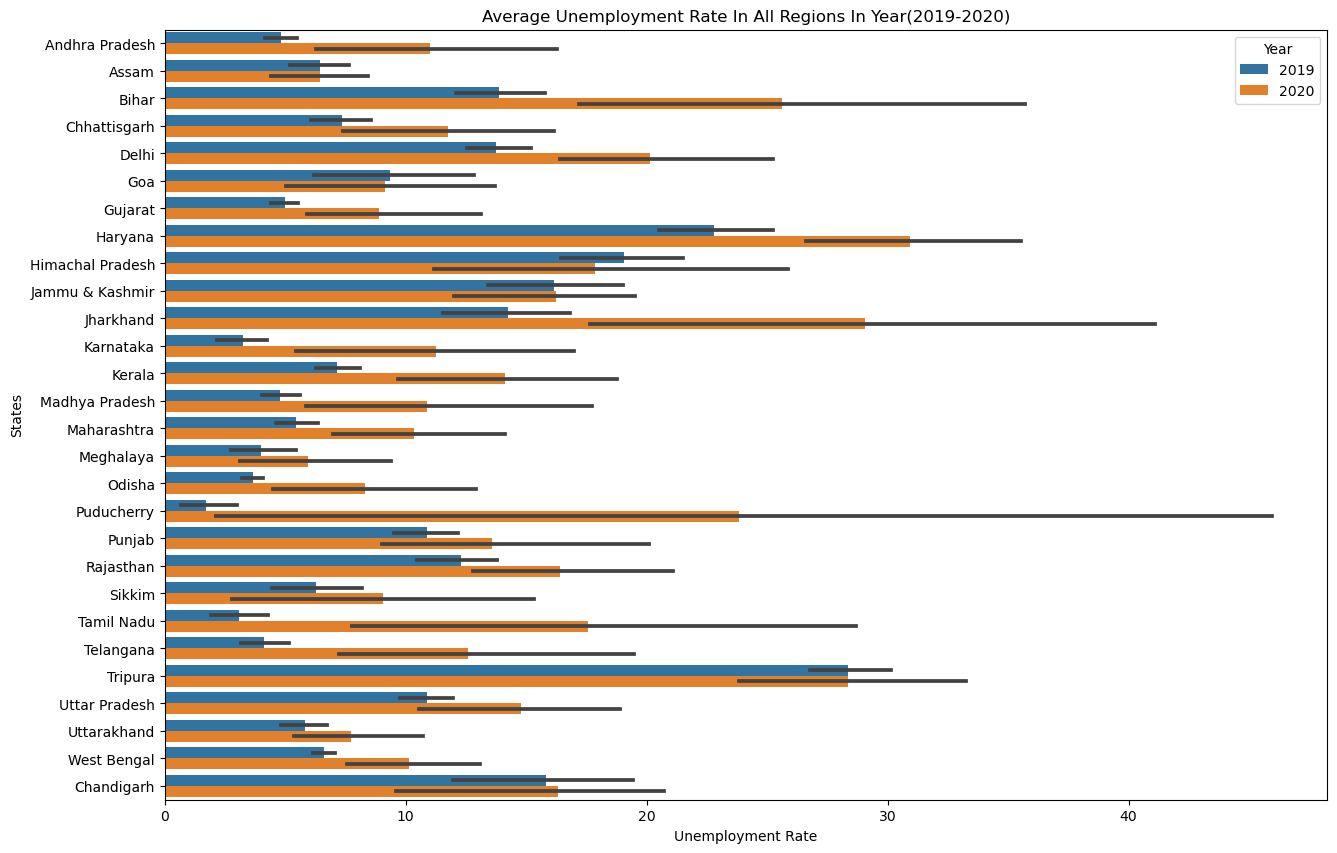

In [35]:
plt.figure(figsize=(15,10))
plt.title("Average Unemployment Rate In All Regions In Year(2019-2020)")
sns.barplot(data=df,y='States',x='Unemployment Rate',hue='Year')

#### Region and Unemployment Rate

In [36]:
region_stats = df.groupby(['Region'])[['Unemployment Rate']].mean().sort_values( by = "Unemployment Rate", ascending = False ).reset_index()
region_stats = round(region_stats, 2)
region_stats

# North Region, has overall Highest Unemployemnt Rate over the entire period and West Region has least

,Region,Unemployment Rate
0,North,15.39
1,East,13.32
2,Northeast,12.39
3,South,8.57
4,West,7.99


In [37]:
region_stats = df.groupby(['Region', 'Year'])[['Unemployment Rate']].mean().sort_values( by = "Unemployment Rate", ascending = False ).reset_index()
region_stats = round(region_stats, 2)
region_stats

# In 2020, East Region has the Highest Mean Unemployemnt Rate and West has the least
# In 2019, North has the Highest Mean Unemployemnt Rate and South has the least

,Region,Year,Unemployment Rate
0,East,2020,18.28
1,North,2020,17.30
2,South,2020,14.81
3,North,2019,14.00
4,Northeast,2020,13.26
5,Northeast,2019,11.78
6,West,2020,10.29
7,East,2019,9.60
8,West,2019,6.38
9,South,2019,4.01


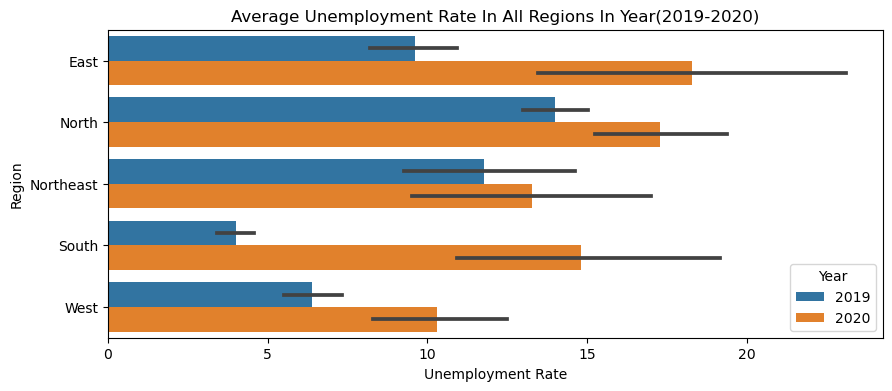

In [38]:
plt.figure(figsize=(10,4))
plt.title("Average Unemployment Rate In All Regions In Year(2019-2020)")
sns.barplot(data=df,y='Region',x='Unemployment Rate',hue='Year')
plt.show()

#### States, Region and Unemployment Rate

In [62]:
# Sunburst chart showing overall unemployment rate in each region and state

unemplo_df = df[['States', 'Region', 'Unemployment Rate', 'Estimated Employed', 'Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Unemployment Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

#### Area and Unemployment Rate

In [39]:
area_stats = df.groupby(['Area'])[['Unemployment Rate']].mean().sort_values( by = "Unemployment Rate", ascending = False ).reset_index()
area_stats = round(area_stats, 2)
area_stats

# Urban Area, has overall Highest Unemployemnt Rate over the entire period than Rural Area

,Area,Unemployment Rate
0,Urban,13.17
1,Rural,10.32


In [40]:
area_stats = df.groupby(['Area', 'Year'])[['Unemployment Rate']].mean().sort_values( by = "Unemployment Rate", ascending = False ).reset_index()
area_stats = round(area_stats, 2)
area_stats

# Urban Area, has more Unemployemnt Rate than Rural Area in both Year

,Area,Year,Unemployment Rate
0,Urban,2020,16.65
1,Rural,2020,13.47
2,Urban,2019,10.67
3,Rural,2019,8.04


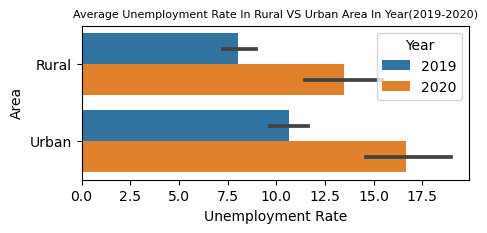

In [51]:
plt.figure(figsize=(5,2))
plt.title("Average Unemployment Rate In Rural VS Urban Area In Year(2019-2020)", size = 8)
sns.barplot(data=df,y='Area',x='Unemployment Rate',hue='Year')
plt.show()

### Impact of Lockdown on States Estimated Employed

- On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days.
- On 14 April, series of lockdown period extension was there till 31st May, and then the lockdown was uplifted however not fully but in phases.
- We will consider April, May, June as the Months of Lockdown.

In [56]:
df_lockdown = df[df["Year_Month"] > '2020-03'].reset_index(drop = True)
df_lockdown.head(2)

,States,Date,Unemployment Rate,Estimated Employed,Labour Participation Rate,Area,Region,Longitude,Latitude,Month,Month Name,Year,Year_Month
0,Andhra Pradesh,2020-04-30,16.29,8792827,36.03,Rural,South,15.9129,79.74,4,April,2020,2020-04
1,Andhra Pradesh,2020-05-31,14.46,9526902,38.16,Rural,South,15.9129,79.74,5,May,2020,2020-05


In [58]:
# Top 5 States most affected after Lockdown

state_stats = df_lockdown.groupby(['States'])[['Unemployment Rate']].mean().sort_values(by = 'Unemployment Rate', ascending = False).reset_index()
state_stats = round(state_stats, 2)
state_stats.head(5)

,States,Unemployment Rate
0,Puducherry,57.70
1,Jharkhand,44.90
2,Haryana,37.69
3,Bihar,36.99
4,Tamil Nadu,31.74


In [59]:
# Regions affected after Lockdown

region_stats = df_lockdown.groupby(['Region'])[['Unemployment Rate']].mean().sort_values( by = "Unemployment Rate", ascending = False ).reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Unemployment Rate
0,East,26.87
1,South,25.54
2,North,19.19
3,West,15.03
4,Northeast,12.75


In [60]:
area_stats = df_lockdown.groupby(['Area'])[['Unemployment Rate']].mean().sort_values( by = "Unemployment Rate", ascending = False ).reset_index()
area_stats = round(area_stats, 2)
area_stats

,Area,Unemployment Rate
0,Urban,22.08
1,Rural,18.26


In [64]:
fig = px.scatter_geo(df_lockdown,'Longitude', 'Latitude', color="Region",
                     hover_name="States", size="Unemployment Rate",
                     animation_frame="Month Name",scope='asia',template='plotly',title='Impact of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [85]:
df_bf_lockdown = df[df["Year_Month"] < '2020-03'].reset_index(drop = True)
df_af_lockdown = df[df["Year_Month"] > '2020-03'].reset_index(drop = True)

g_bf_lockdown = df_bf_lockdown.groupby('States')['Unemployment Rate'].mean().reset_index()
g_af_lockdown = df_af_lockdown.groupby('States')['Unemployment Rate'].mean().reset_index()

g_bf_lockdown['Unemployment Rate After Lockdown'] = g_af_lockdown['Unemployment Rate']
g_bf_lockdown.columns = ['States', 'Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']

g_bf_lockdown

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,5.037500,15.778333
1,Assam,6.372632,6.388000
2,Bihar,13.833000,36.988333
3,Chandigarh,16.325000,7.220000
4,Chhattisgarh,7.706500,14.846667
5,Delhi,14.230500,24.165000
6,Goa,8.507500,15.890000
7,Gujarat,5.176000,11.681667
8,Haryana,22.935500,37.693333
9,Himachal Pradesh,19.129000,15.400000


In [89]:
# Percentage Change in Unemployment Rate before and after lockdown

g_bf_lockdown['Percentage Change'] = round(g_bf_lockdown['Unemployment Rate After Lockdown'] - g_bf_lockdown['Unemployment Rate Before Lockdown']/g_bf_lockdown['Unemployment Rate Before Lockdown'],2)
df_final = g_bf_lockdown.sort_values(by = 'Percentage Change', ascending = False)
df_final.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown,Percentage Change
18,Puducherry,1.5930,57.700000,56.70
11,Jharkhand,14.2795,44.896667,43.90
8,Haryana,22.9355,37.693333,36.69
2,Bihar,13.8330,36.988333,35.99
22,Tamil Nadu,2.8365,31.735000,30.74


In [90]:
# percentage change in unemployment after lockdown

fig = px.bar(df_final, x='States',y='Percentage Change',color='Percentage Change',
            title='Percentage Change in Unemployment in Each State After Lockdown',template='ggplot2')
fig.show()

#### Insights:
1. Worstly Affected States after Lockdown are:- Puducherry, Jharkhand, Haryana, Bihar, Tamil Nadu.
2. Worstly Affected Region after Lockdown are:- East and South.
3. Worstly Affected Area after Lockdown is:- Urban. 